# Importing Libraies

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


# Loading DataSet using keras Datasets

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images , train_labels) , (test_images , test_labels) = fashion_mnist.load_data()

# Size of the training dataset

In [ ]:
train_images.shape

(60000, 28, 28)

# Class names of the labels

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# train labels

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

# Size of the test image data

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

# plotting tha image of the train data

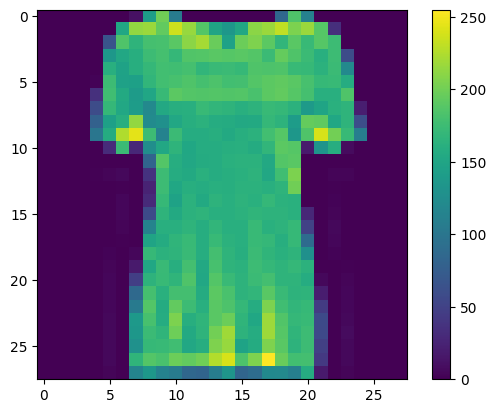

In [ ]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

# Plotting some images from the tarining set

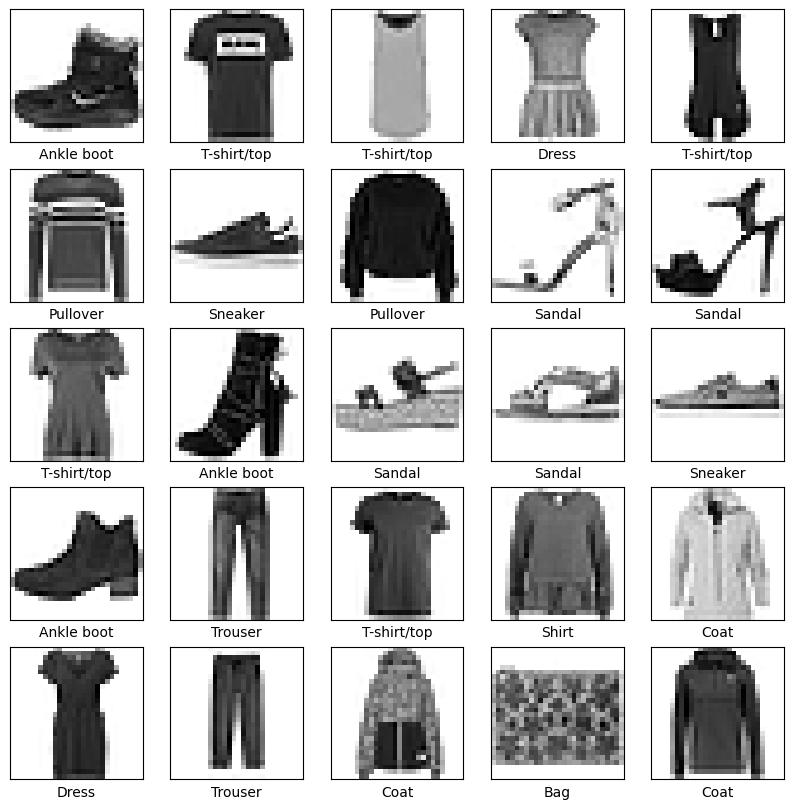

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

# using Sequential model from keras and layers

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),  # Define the input shape here
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Complining the Model to check accuracy

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Training the model

In [ ]:
model.fit(train_images, train_labels ,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8478 - loss: 0.4481
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8488 - loss: 0.4421
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8518 - loss: 0.4446
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8516 - loss: 0.4443
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8497 - loss: 0.4558
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8467 - loss: 0.4507
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8538 - loss: 0.4379
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8526 - loss: 0.4375
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8557 - loss: 0.4390
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8537 - loss: 0.4416


# Evaluate accuracy

In [ ]:
test_loss , test_acc = model.evaluate(test_images , test_labels, verbose=2)

print('\n Test accuracy : ', test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.8319 - loss: 0.5582

 Test accuracy :  0.8319000005722046


In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
predictions[26]

array([8.9520487e-05, 2.2622626e-09, 2.9569222e-02, 1.9399848e-04,
       5.4025757e-01, 4.7577760e-26, 4.2988625e-01, 0.0000000e+00,
       3.3922117e-06, 1.8258919e-42], dtype=float32)

In [ ]:
np.argmax(predictions[26])

4

In [ ]:
test_labels[26]

6

In [ ]:
def plot_image(i , predictions_array , true_label, img):
  true_label , img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'Red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
              color=color)


def plot_value_array(i , predictions_array , true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10) , predictions_array , color = '#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Verify Predictions

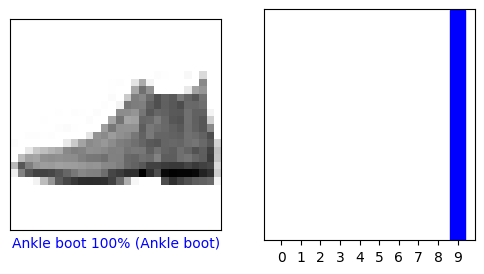

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


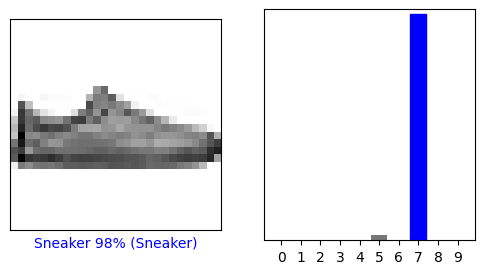

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


# Plotting the X test Images and Predictng Labels

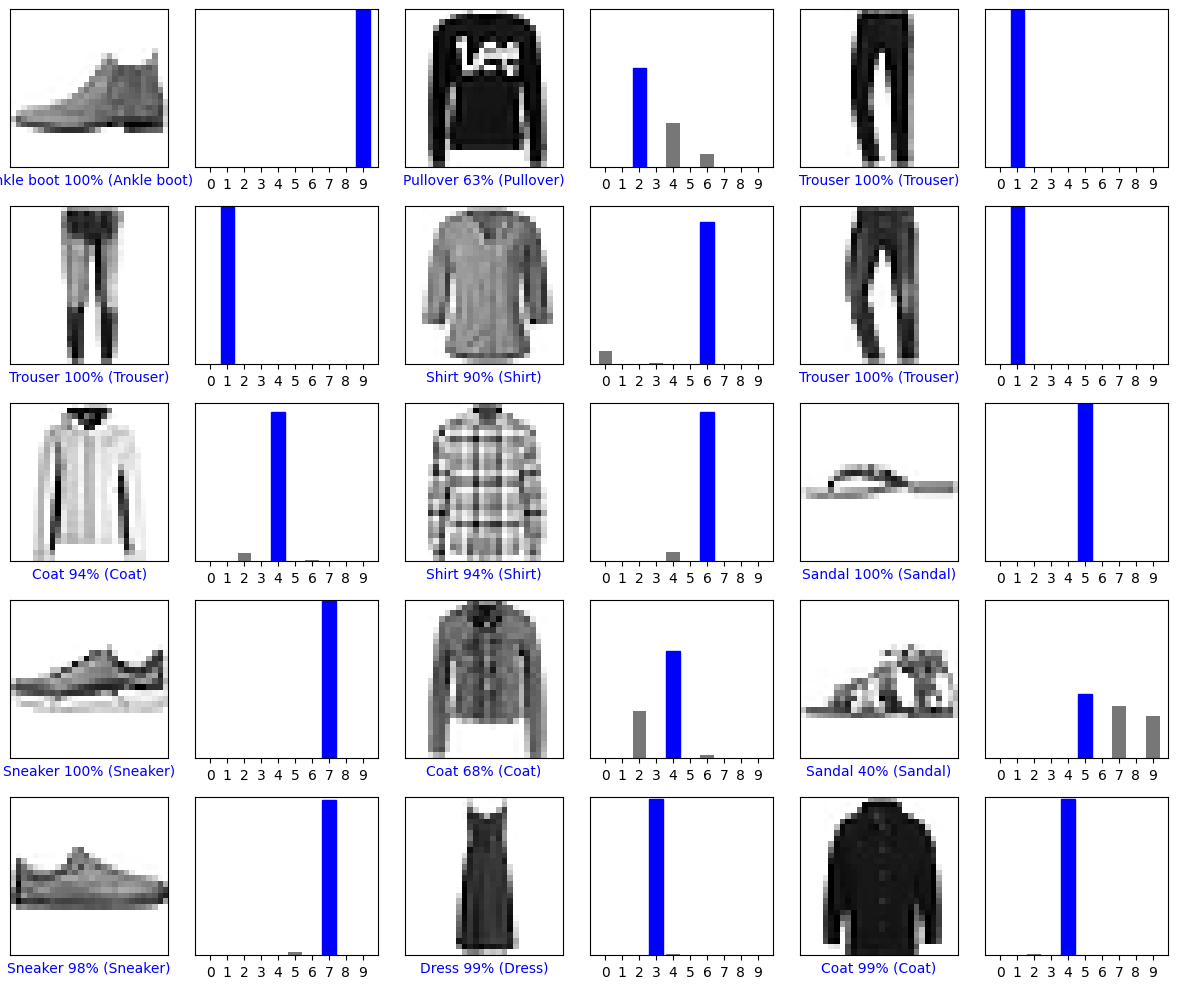

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


# Use the trained Model to make  Predictions

In [ ]:
img = test_images[25]

print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
[[8.2746136e-04 2.8581466e-04 6.7046660e-01 6.3137137e-03 2.2718361e-01
  7.2624541e-16 9.3443014e-02 4.9988240e-29 1.4797463e-03 2.7285959e-22]]


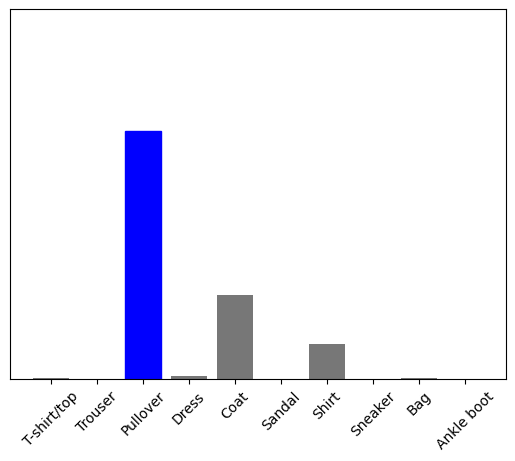

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()


In [ ]:
np.argmax(predictions_single[0])

2

In [ ]:
model.save('imageClassification.keras')  # Saves the entire model including architecture, weights, and optimizer
